# B4 BANK - Project ASO

* Projeto contratado pelo B4 BANK com a RankMyApp para avaliação do aplicativo nas métricas do Canal Orgânico

### Importar dados

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



df = pd.read_csv(r"C:\Users\asus\Downloads\Retained_Bank.csv", sep=';', header=0)

## Análise Exploratória de Dados

In [3]:
# dimensões do df
print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		92
Colunas:	14


As primeiras 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [4]:
df.head()

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,01/08/2019,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,02/08/2019,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
2,03/08/2019,B4 Bank,Organic,1725,401,0.232,360,0.898,348,0.868,348,0.868,340,0.848
3,04/08/2019,B4 Bank,Organic,1579,410,0.260,365,0.890,350,0.854,341,0.832,330,0.805
4,05/08/2019,B4 Bank,Organic,1488,374,0.251,334,0.893,323,0.864,317,0.848,303,0.810


É interessante pôr _ nos espaços dos títulos das colunas

In [50]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [ ]:
Como estamos interessados nos dados de aquisição orgânica, faremos o filtro.

In [92]:
df = df[df['Acquisition_Channel']=='Organic']

In [93]:
# ver resumo estatístico do dados numéricos
df.describe()

,Store_Listing_Visitors,Installers,Visitor-to-Installer_conversion_rate,Installers_retained_for_1_day,Installer-to-1_day_retention_rate,Installers_retained_for_7_days,Installer-to-7_days_retention_rate,Installers_retained_for_15_days,Installer-to-15_days_retention_rate,Installers_retained_for_30_days,Installer-to-30_days_retention_rate,Month
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2017.307692,370.395604,0.201396,328.725275,0.883758,314.164835,0.843231,306.120879,0.820648,297.736264,0.797758,8.989011
std,1191.462516,130.366993,0.051920,119.881151,0.025840,116.244499,0.032395,114.391514,0.036368,111.959202,0.037884,0.823198
min,757.000000,133.000000,0.092000,115.000000,0.802000,110.000000,0.738000,107.000000,0.708000,104.000000,0.678000,8.000000
25%,1335.500000,268.000000,0.162500,230.500000,0.870500,216.000000,0.828500,207.500000,0.803500,198.500000,0.782500,8.000000
50%,1596.000000,386.000000,0.201000,341.000000,0.888000,326.000000,0.848000,319.000000,0.824000,307.000000,0.803000,9.000000
75%,2348.500000,441.000000,0.251000,394.000000,0.900000,377.500000,0.864000,366.500000,0.850000,358.500000,0.825000,10.000000
max,8292.000000,875.000000,0.292000,809.000000,0.928000,784.000000,0.898000,768.000000,0.878000,751.000000,0.858000,10.000000


In [94]:
# tipo das variáveis
print("\nTIPOS DAS VARIÁVEIS:")
print(df.dtypes)


TIPOS DAS VARIÁVEIS:
Date                                    datetime64[ns]
Package_Name                                    object
Acquisition_Channel                             object
Store_Listing_Visitors                           int64
Installers                                       int64
Visitor-to-Installer_conversion_rate           float64
Installers_retained_for_1_day                    int64
Installer-to-1_day_retention_rate              float64
Installers_retained_for_7_days                   int64
Installer-to-7_days_retention_rate             float64
Installers_retained_for_15_days                  int64
Installer-to-15_days_retention_rate            float64
Installers_retained_for_30_days                  int64
Installer-to-30_days_retention_rate            float64
Month                                            int64
dtype: object


Se faz necessário alterar o tipo da coluna Date para o tipo DateTime

In [95]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', dayfirst=True, errors='coerce')

In [96]:
# valores ausentes
print("\nVALORES AUSENTES:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
Month                                   0.0
Installer-to-30_days_retention_rate     0.0
Installers_retained_for_30_days         0.0
Installer-to-15_days_retention_rate     0.0
Installers_retained_for_15_days         0.0
Installer-to-7_days_retention_rate      0.0
Installers_retained_for_7_days          0.0
Installer-to-1_day_retention_rate       0.0
Installers_retained_for_1_day           0.0
Visitor-to-Installer_conversion_rate    0.0
Installers                              0.0
Store_Listing_Visitors                  0.0
Acquisition_Channel                     0.0
Package_Name                            0.0
Date                                    0.0
dtype: float64


Retirar a linha que contém os valores zerados (correspondem apenas a 1,0% do total)

In [97]:
df= df.dropna()

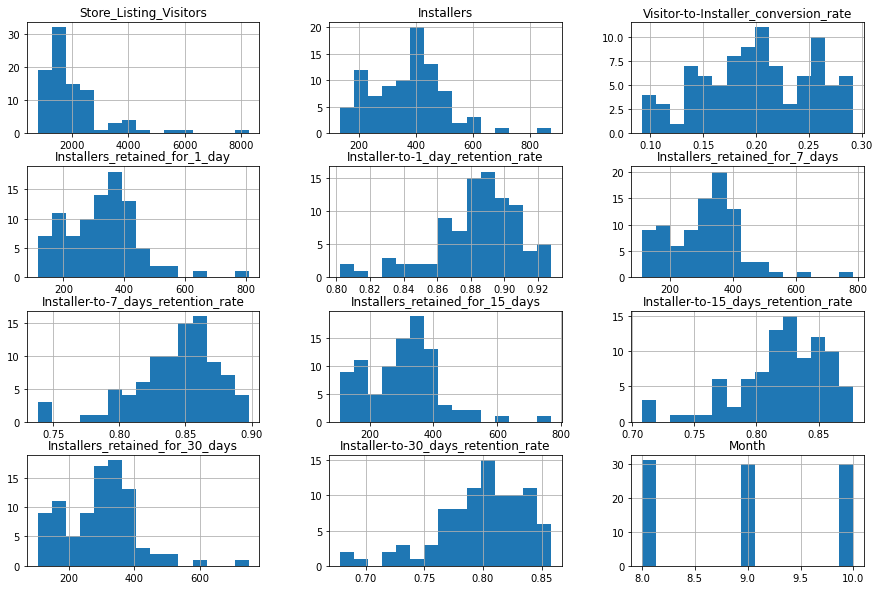

In [98]:
df.hist(bins=15, figsize=(15,10));

Criação de uma coluna de mês, será interessante para agrupamento

In [99]:
df['Month'] = df['Date'].dt.month

Criação de df's com a soma e a média de visitantes por mês

In [100]:
df_mon_vis = df.groupby(['Month'])['Store_Listing_Visitors'].mean().reset_index()
df_mon_vis_mean = df.groupby(['Month'])['Installers'].mean().reset_index()



Criação de gráficos das séries temporais das infos mais relevantes

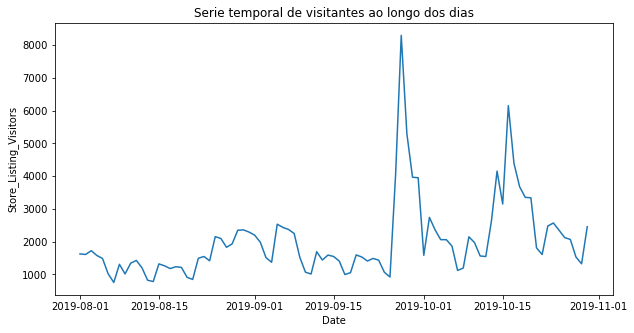

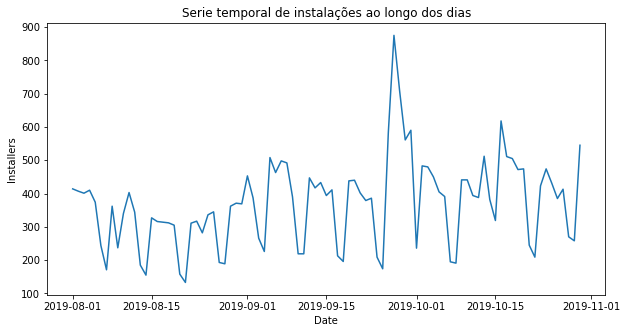

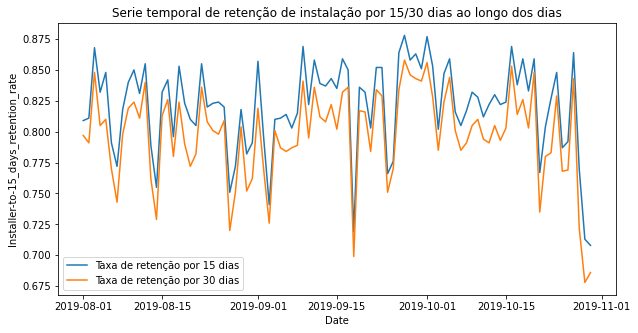

In [101]:
sns.lineplot(x="Date", y="Store_Listing_Visitors", data=df)
plt.title('Serie temporal de visitantes ao longo dos dias')

plt.show()

sns.lineplot(x="Date", y="Installers", data=df)
plt.title('Serie temporal de instalações ao longo dos dias')
plt.show()

sns.lineplot(x="Date", y="Installer-to-15_days_retention_rate", data=df)
plt.title('Serie temporal de retenção de instalação por 15/30 dias ao longo dos dias')

sns.lineplot(x="Date", y="Installer-to-30_days_retention_rate", data=df)
plt.title('Serie temporal de retenção de instalação por 15/30 dias ao longo dos dias')

plt.legend(labels=["Taxa de retenção por 15 dias","Taxa de retenção por 30 dias"])
plt.show()


Criação de gráficos de barra de visitas e instalações agrupados por mês

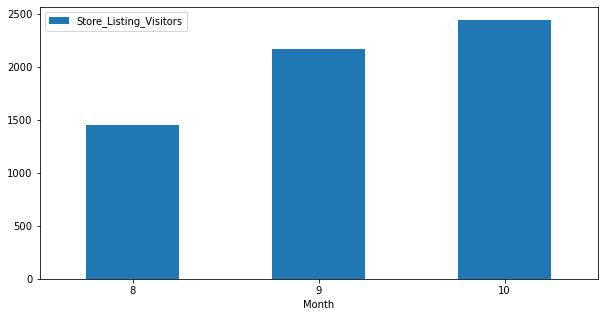

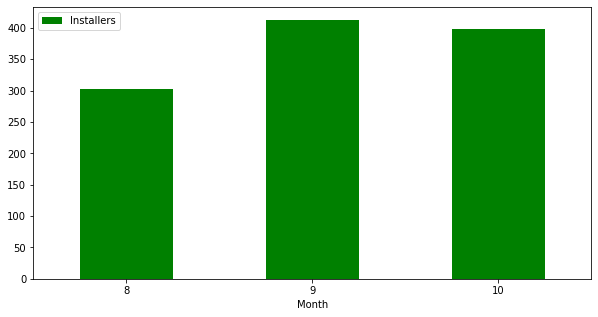

In [102]:
ax = df_mon_vis.plot.bar(x='Month', y='Store_Listing_Visitors', rot=0)


ax_2 = df_mon_vis_mean.plot.bar(x='Month', y='Installers', rot=0, color='green')


É possível perceber uma tendência no aumento de visitas do mês de Agosto até o final de Outubro, entretanto há uma pequena queda nas instações se comparado com o mês de setembro.

* 10 dias onde houve o maior número de visitas ao app na loja, vale destacar o primeiro lugar com um número bastante alto, se houve alguma campanha diferenciada nesse dia

In [103]:
df.groupby(['Date'])['Store_Listing_Visitors','Installers','Installer-to-30_days_retention_rate'].max().reset_index().sort_values(by='Store_Listing_Visitors', ascending=False)[:10]


<ipython-input-103-d1bf3b534a65>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Date'])['Store_Listing_Visitors','Installers','Installer-to-30_days_retention_rate'].max().reset_index().sort_values(by='Store_Listing_Visitors', ascending=False)[:10]


,Date,Store_Listing_Visitors,Installers,Installer-to-30_days_retention_rate
57,2019-09-27,8292,875,0.858
76,2019-10-16,6149,618,0.853
58,2019-09-28,5290,709,0.846
77,2019-10-17,4388,511,0.814
74,2019-10-14,4152,382,0.793
56,2019-09-26,4050,583,0.834
59,2019-09-29,3966,561,0.843
60,2019-09-30,3950,590,0.841
78,2019-10-18,3677,505,0.826
79,2019-10-19,3352,472,0.803


# Modelo de Machine Learning

* Criação de um modelo de machine learning para prever a quantidade de usuários retidos 30 dias após instalação

Seleção de DF's númericos e DF do target(alvo)

In [133]:
X = df.copy()
Y = pd.DataFrame()

# Seleção de apenas colunas numéricas (menos o alvo)
X = X.drop(['Installers_retained_for_30_days','Month'],
                         axis=1).select_dtypes(include=['float64','int64'])
# Seleção do alvo
Y['Installers_retained_for_30_days'] = df['Installers_retained_for_30_days']

Aqui normalizamos nossas variáveis númericas e posteriormente dividimos nosso conjunto de dados em treino e teste

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2)



Finalmente, utilizamos o algoritmo de regressão linear para treinar o nosso modelo, e em seguida predizer o futuros valores
de Y (Retenção de usuários após 30 dias)

In [151]:
from sklearn import linear_model


clf = linear_model.LinearRegression()

#train model
clf.fit(X_train, Y_train)

#predict
y_pred = clf.predict(X_test)[:10]
y_true = Y_test[:10]

print(y_pred)
print(y_true)

[[490.21796552]
 [259.73031236]
 [400.59411559]
 [340.33575378]
 [225.01056254]
 [114.37486896]
 [245.16804567]
 [265.69906176]
 [356.62083787]
 [332.96375997]]
    Installers_retained_for_30_days
56                              486
21                              260
35                              400
2                               340
23                              226
13                              113
16                              245
14                              266
71                              357
84                              331


Podemos percerber que as previsões foram muito assertivas, as diferenças entre os valores preditos e os reais é bem pequena
para esse tipo de avaliação.

Com isso, utilizamos métricas de error para avaliar de forma geral a nossa regressão

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MAE: %.2f' % mean_absolute_error(Y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(Y_test, y_pred))

MAE: 0.75
Mean squared error: 1.34
R2 Score: 1.00


Não surpreendendo, vemos que o erro médio quadrático foi na ordem de 1.34, que é um valor baixíssimo para nosso problema.